# [SOC-88] Visualizing Police Force Data

### Professor David Harding

## Table of Contents

[Introduction](#intro)

[Data Visualization](#1)

- [Categorical Data](#1.1)
    - [Question 1](#q1)

- [Numerical Data](#1.2)
    - [Question 2](#q2)

[More Advanced Plots: Time of Incident](#2)

## Introduction <a id='intro'></a>

In this homework, you will practice different data visualization techniques you learned about in lecture. The police incidents data has been taken from [Open Data Minneapolis](http://opendata.minneapolismn.gov/). 

<img src="Data/7a9713-20180517-minneapolis-police-use-of-force-reduced.png" style="width:600px">

<div style="text-align: right">- Brandt Williams, <a href='https://www.mprnews.org/story/2018/05/18/use-of-force-by-minneapolis-police-down'>MPR News</a></div>

There are two main data tables used in this assignment: **Police_Incidents_2019.csv** and **Police_Use_of_Force.csv**. 

The first file, **Police_Incidents_2019.csv**, has records of all police incidents that took place in 2019. Its columns contain information such as the latitude-longitude information of incidents, police precinct and neighborhood in which the incident occurred, time and date of the report, type of crime, etc. 

The second file, **Police_Use_of_Force.csv**, has information on recorded force use (by the police) cases. It shares similar columns as the first file, such as the latitude-longitude information of incidents, what precinct and neighborhood the incident took place in, and date of the report. However, it also contains information specifically relevant to the use of force, like whether or not the subject was injured as a result of the force use, cause of intervention, what kind of force was used by an officer, subject's age, gender and race, etc.

---


First we will begin by running a code cell that will load the libraries you'll be using.

In [1]:
from datascience import *
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import datetime

## Data Visualization <a id='1'></a>

**Data visualization** is the graphical representation of information and data. By using visual elements like charts, graphs, & maps, data visualization tools provide an accessible way to see and understand patterns in data. The general goal of data visualization is to communicate key information clearly and efficiently to its audience. 

**Edward Tufte**, in his book *The Visual Display of Quantitative Information*, stated that effective data visualization should:

- avoid distorting what the data has to say
- present many numbers in a small space
- encourage the eye to compare different pieces of data
- serve a reasonably clear purpose: description, exploration, tabulation or decoration
- ...and more

More about Tufte's theory can be found [here](https://moz.com/blog/data-visualization-principles-lessons-from-tufte).

Let's first explore the two datasets read in as datascience tables `incidents` and `force`, respectively. We can see that there are quite a number of columns for both tables. Can you find the columns corresponding to what's been mentioned in the description of the csv files above? What are some notable differences between the two tables?

In [2]:
# Police Incident Data, 2019
incidents = Table().read_table('Data/Police_Incidents_2019.csv')

incidents.show(5)

X,Y,publicaddress,caseNumber,precinct,reportedDate,reportedTime,beginDate,reportedDateTime,beginTime,offense,description,UCRCode,enteredDate,centergbsid,centerLong,centerLat,centerX,centerY,neighborhood,lastchanged,LastUpdateDateETL,OBJECTID
-93.3118,45.006,0024XX BROADWAY AVE W,MP201971497,4,2019-03-13T00:00:00.000Z,1046,2019-03-13T00:00:00.000Z,2019-03-13T10:46:00.000Z,1046,THEFT,OTHER THEFT,7,2019-03-13T00:00:00.000Z,10909,-93.3118,45.006,-10387423,5622470,Willard - Hay,2019-03-13T00:00:00.000Z,2019-03-15T08:15:26.000Z,9001
-93.3121,44.9979,0018XX SHERIDAN AVE N,MP201971522,4,2019-03-13T00:00:00.000Z,1048,2019-03-12T00:00:00.000Z,2019-03-13T10:48:00.000Z,2000,THEFT,OTHER THEFT,7,2019-03-13T00:00:00.000Z,14596,-93.3121,44.9979,-10387450,5621188,Willard - Hay,2019-03-13T00:00:00.000Z,2019-03-15T08:15:26.000Z,9002
-93.2346,45.0087,0019XX HAYES ST NE,MP201971533,2,2019-03-13T00:00:00.000Z,1141,2019-03-13T00:00:00.000Z,2019-03-13T11:41:00.000Z,215,CSCR,CSC - RAPE,3,2019-03-13T00:00:00.000Z,17221,-93.2346,45.0087,-10378828,5622888,Windom Park,2019-03-20T00:00:00.000Z,2019-03-21T08:15:32.000Z,9003
-93.2818,45.0048,0024XX WASHINGTON AVE N,MP201971617,4,2019-03-13T00:00:00.000Z,1317,2019-03-12T00:00:00.000Z,2019-03-13T13:17:00.000Z,1749,THEFT,OTHER THEFT,7,2019-03-13T00:00:00.000Z,13725,-93.2818,45.0048,-10384081,5622275,Hawthorne,2019-03-13T00:00:00.000Z,2019-03-15T08:15:26.000Z,9004
-93.2283,44.9296,0040XX NOKOMIS AVE S,MP201971661,3,2019-03-13T00:00:00.000Z,1326,2019-02-27T00:00:00.000Z,2019-03-13T13:26:00.000Z,900,ONLTHT,ON-LINE THEFT,7,2019-03-13T00:00:00.000Z,19761,-93.2283,44.9296,-10378128,5610445,Standish,2019-03-13T00:00:00.000Z,2019-03-15T08:15:26.000Z,9005


In [3]:
# Police Use of Force Records
force = Table().read_table('Data/Police_Use_of_Force.csv')
force.show(5)

X,Y,PoliceUseOfForceID,CaseNumber,ResponseDate,Problem,Is911Call,PrimaryOffense,SubjectInjury,ForceReportNumber,SubjectRole,SubjectRoleNumber,ForceType,ForceTypeAction,Race,Sex,EventAge,TypeOfResistance,Precinct,Neighborhood,TotalCityCallsForYear,TotalPrecinctCallsForYear,TotalNeighborhoodCallsForYear,CenterGBSID,CenterLatitude,CenterLongitude,CenterX,CenterY,DateAdded,OBJECTID
-93.2406,44.9457,1535693,08-134948,2008-05-11T12:27:59.000Z,Fight,Yes,DISCON,Yes,1,A,2,Bodily Force,Kicks,Other / Mixed Race,Male,23,Verbal Non-Compliance,03,Corcoran,322402,84018,3058,19708,44.9457,-93.2406,-1.03795e+07,5.61297e+06,2019-07-05T08:18:58.000Z,1001
-93.2725,44.9796,1535694,08-142883,2008-05-18T04:01:02.000Z,Disturbance,No,DISCON,nan,1,A,1,Chemical Irritant,Personal Mace,Black,Male,25,Tensed,01,Downtown West,322402,46998,23458,25832,44.9796,-93.2725,-1.0383e+07,5.61831e+06,2019-07-05T08:18:58.000Z,1002
-93.2764,44.9768,1535695,08-144119,2008-05-19T05:08:38.000Z,Suspicious Person,No,NARC,No,2,A,1,Bodily Force,Joint Lock,Black,Male,22,Commission of Crime,01,Downtown West,322402,46998,23458,21655,44.9768,-93.2764,-1.03835e+07,5.61787e+06,2019-07-05T08:18:58.000Z,1003
-93.288,45.011,1535696,08-148956,2008-05-23T03:13:30.000Z,Sound of Shots Fired,Yes,WEAP,No,2,A,1,Bodily Force,Punches,Black,Male,18,Fled on Foot,04,Hawthorne,322402,80434,13679,18762,45.011,-93.288,-1.03848e+07,5.62326e+06,2019-07-05T08:18:58.000Z,1004
-93.2735,44.9484,1535697,08-159458,2008-05-31T22:52:58.000Z,Person with a Gun,Yes,FALSNM,No,1,A,1,Bodily Force,Kicks,Black,Male,30,Verbal Non-Compliance,03,Phillips West,322402,84018,6359,19103,44.9484,-93.2735,-1.03832e+07,5.61339e+06,2019-07-05T08:18:58.000Z,1005


## Categorical Data <a id='1.1'></a>

A **categorical variable** is a variable that can take on one of a limited number of possible values. Examples of categorical variables include race and neighborhoods. For instance,

- The category "race" could contain the values "African American", "Asian", "Hispanic" or "Caucasian".
- The category "neighborhoods" could contain the values "Windom Park", "Hawthorne" or "Standish".

Categorical variables can be divided into two types: **nominal** and **ordinal**. There is no inherent order to nominal variables. Stated differently, they aren't ranked according to an order system. The type of variable that has a logical order, such as type of degree completed or age group, are referred to as ordinal variables instead. Age group is an important example since it's numerical, but the age values have been collapsed into groups (such as 10-19, 20-29, etc.), it is an ordinal variable.

The `incidents` table has the following categorical variables: `offense`, `description`, and `neighborhood`


### Question 1 <a id='q1'></a>
Choose an appropriate visualization to look at the distribution of the types of incidents. Use the code cell below to create and design your plot. Then, describe your design choices in making the plot.

In [4]:
import folium
import json
import os

#Updates the folium package in case you already installed it before
!pip install folium --upgrade -q

In [5]:
neighborhood = json.load(open('Data/Minneapolis_Neighborhoods.geojson'))

In [6]:
minneapolis_coords = [44.977, -93.265]
m = folium.Map(minneapolis_coords, zoom_start=12)
m

In [7]:
neighborhood_incidents = incidents.group('neighborhood').take[:87]
neighborhood_incidents

neighborhood,count
Armatage,42
Audubon Park,61
Bancroft,51
Beltrami,34
Bottineau,31
Bryant,29
Bryn - Mawr,38
CARAG,150
Camden Industrial,7
Cedar - Isles - Dean,35


In [8]:
neighborhood_incidents_df = neighborhood_incidents.to_df()
neighborhood_incidents_df['neighborhood'] = neighborhood_incidents.column('neighborhood')
neighborhood_incidents_df

,neighborhood,count
0,Armatage,42
1,Audubon Park,61
2,Bancroft,51
3,Beltrami,34
4,Bottineau,31
...,...,...
82,West Calhoun,42
83,Whittier,489
84,Willard - Hay,178
85,Windom,78


In [9]:
m = folium.Map(minneapolis_coords, zoom_start=12)
folium.Choropleth(
    geo_data=neighborhood,
    data=neighborhood_incidents_df,
    columns=['neighborhood', 'count'],
    key_on='feature.properties.BDNAME',
    bins = 9,
    fill_color='YlOrRd',
    fill_opacity=0.8,
    legend_name='Number of Incidents'
).add_to(m)
m

**Describe the features you chose.** Some questions to address: Did you keep `Nan` values? What do those values represent in the data? Did you organize the data in any particular way? Why? What other design choices did you make? What message are you trying to communicate, and what decisions did you make in order to do so? Please answer in 5-6 sentences.

For this graphical representation, since I wanted to show the number of incidents per neighborhood, I decided to remove the Nan values which would not show up on the map. The Nan values may represent incidents that overlap into other different neighborhoods or simply incidents that are not neighborhood specific. In terms of data organization, I organized the data to be grouped by neighborhood to see the number of incidents per nieghborhood. The message that I am trying to communicate is showing the concentration of incidents in the different neighorhoods in Minneapolis. With the graph we can see that the further in towards the city, the larger the number of incidents. In order to highlight the differences in the number of incidents, I incresed the bins to show more color differences.

## Numerical Data <a id='1.2'></a>

A **numerical variable** is also called a continuous variable; it is a variable that can take on any value within a finite or infinite range. For example:

- The numerical variable "age" may take on the value 0, 1, 2 .... on to the age of the oldest person in the dataset.
- The numerical variable "count" may take on the value 0, 1, 2, .... up to however many things we're counting.

The `force` table has the following numerical variables: `EventAge`, `TotalCityCallsForYear`, `TotalPrecinctCallsForYear`, `TotalNeighborhoodCallsForYear`, as well as `X/Y` for the latitude-longitude information.


### Question 2 <a id='q2'></a>
At what age are people experiencing the most incidences of force? In the cell below, choose an appropriate visualization to look at the distribution of ages for individuals who experienced an incident with force. Refer to the dataset to choose the correct column names & their possible values. In addition, use subplots to create a side-by-side comparison with the distribution of ages for male vs female individuals.

In [10]:
force.show(5)

X,Y,PoliceUseOfForceID,CaseNumber,ResponseDate,Problem,Is911Call,PrimaryOffense,SubjectInjury,ForceReportNumber,SubjectRole,SubjectRoleNumber,ForceType,ForceTypeAction,Race,Sex,EventAge,TypeOfResistance,Precinct,Neighborhood,TotalCityCallsForYear,TotalPrecinctCallsForYear,TotalNeighborhoodCallsForYear,CenterGBSID,CenterLatitude,CenterLongitude,CenterX,CenterY,DateAdded,OBJECTID
-93.2406,44.9457,1535693,08-134948,2008-05-11T12:27:59.000Z,Fight,Yes,DISCON,Yes,1,A,2,Bodily Force,Kicks,Other / Mixed Race,Male,23,Verbal Non-Compliance,03,Corcoran,322402,84018,3058,19708,44.9457,-93.2406,-1.03795e+07,5.61297e+06,2019-07-05T08:18:58.000Z,1001
-93.2725,44.9796,1535694,08-142883,2008-05-18T04:01:02.000Z,Disturbance,No,DISCON,nan,1,A,1,Chemical Irritant,Personal Mace,Black,Male,25,Tensed,01,Downtown West,322402,46998,23458,25832,44.9796,-93.2725,-1.0383e+07,5.61831e+06,2019-07-05T08:18:58.000Z,1002
-93.2764,44.9768,1535695,08-144119,2008-05-19T05:08:38.000Z,Suspicious Person,No,NARC,No,2,A,1,Bodily Force,Joint Lock,Black,Male,22,Commission of Crime,01,Downtown West,322402,46998,23458,21655,44.9768,-93.2764,-1.03835e+07,5.61787e+06,2019-07-05T08:18:58.000Z,1003
-93.288,45.011,1535696,08-148956,2008-05-23T03:13:30.000Z,Sound of Shots Fired,Yes,WEAP,No,2,A,1,Bodily Force,Punches,Black,Male,18,Fled on Foot,04,Hawthorne,322402,80434,13679,18762,45.011,-93.288,-1.03848e+07,5.62326e+06,2019-07-05T08:18:58.000Z,1004
-93.2735,44.9484,1535697,08-159458,2008-05-31T22:52:58.000Z,Person with a Gun,Yes,FALSNM,No,1,A,1,Bodily Force,Kicks,Black,Male,30,Verbal Non-Compliance,03,Phillips West,322402,84018,6359,19103,44.9484,-93.2735,-1.03832e+07,5.61339e+06,2019-07-05T08:18:58.000Z,1005


In [11]:
#Splitting female and male
force_male = force.where(force['Sex'] == 'Male' )
force_female = force.where(force['Sex'] == 'Female')
force_male.show(5)
force_female.show(5)

X,Y,PoliceUseOfForceID,CaseNumber,ResponseDate,Problem,Is911Call,PrimaryOffense,SubjectInjury,ForceReportNumber,SubjectRole,SubjectRoleNumber,ForceType,ForceTypeAction,Race,Sex,EventAge,TypeOfResistance,Precinct,Neighborhood,TotalCityCallsForYear,TotalPrecinctCallsForYear,TotalNeighborhoodCallsForYear,CenterGBSID,CenterLatitude,CenterLongitude,CenterX,CenterY,DateAdded,OBJECTID
-93.2406,44.9457,1535693,08-134948,2008-05-11T12:27:59.000Z,Fight,Yes,DISCON,Yes,1,A,2,Bodily Force,Kicks,Other / Mixed Race,Male,23,Verbal Non-Compliance,03,Corcoran,322402,84018,3058,19708,44.9457,-93.2406,-1.03795e+07,5.61297e+06,2019-07-05T08:18:58.000Z,1001
-93.2725,44.9796,1535694,08-142883,2008-05-18T04:01:02.000Z,Disturbance,No,DISCON,nan,1,A,1,Chemical Irritant,Personal Mace,Black,Male,25,Tensed,01,Downtown West,322402,46998,23458,25832,44.9796,-93.2725,-1.0383e+07,5.61831e+06,2019-07-05T08:18:58.000Z,1002
-93.2764,44.9768,1535695,08-144119,2008-05-19T05:08:38.000Z,Suspicious Person,No,NARC,No,2,A,1,Bodily Force,Joint Lock,Black,Male,22,Commission of Crime,01,Downtown West,322402,46998,23458,21655,44.9768,-93.2764,-1.03835e+07,5.61787e+06,2019-07-05T08:18:58.000Z,1003
-93.288,45.011,1535696,08-148956,2008-05-23T03:13:30.000Z,Sound of Shots Fired,Yes,WEAP,No,2,A,1,Bodily Force,Punches,Black,Male,18,Fled on Foot,04,Hawthorne,322402,80434,13679,18762,45.011,-93.288,-1.03848e+07,5.62326e+06,2019-07-05T08:18:58.000Z,1004
-93.2735,44.9484,1535697,08-159458,2008-05-31T22:52:58.000Z,Person with a Gun,Yes,FALSNM,No,1,A,1,Bodily Force,Kicks,Black,Male,30,Verbal Non-Compliance,03,Phillips West,322402,84018,6359,19103,44.9484,-93.2735,-1.03832e+07,5.61339e+06,2019-07-05T08:18:58.000Z,1005


X,Y,PoliceUseOfForceID,CaseNumber,ResponseDate,Problem,Is911Call,PrimaryOffense,SubjectInjury,ForceReportNumber,SubjectRole,SubjectRoleNumber,ForceType,ForceTypeAction,Race,Sex,EventAge,TypeOfResistance,Precinct,Neighborhood,TotalCityCallsForYear,TotalPrecinctCallsForYear,TotalNeighborhoodCallsForYear,CenterGBSID,CenterLatitude,CenterLongitude,CenterX,CenterY,DateAdded,OBJECTID
-93.2778,44.9694,1535699,08-110963,2008-04-20T05:39:55.000Z,Fight,No,DASTR,No,2,A,1,Bodily Force,Punches,Black,Female,17,Commission of Crime,01,Loring Park,322402,46998,5414,16712,44.9694,-93.2778,-1.03836e+07,5.6167e+06,2019-07-05T08:18:58.000Z,1007
-93.2778,44.9694,1535711,08-110963,2008-04-20T05:39:55.000Z,Fight,No,DASTR,No,1,A,1,Bodily Force,Joint Lock,Black,Female,17,Commission of Crime,01,Loring Park,322402,46998,5414,16712,44.9694,-93.2778,-1.03836e+07,5.6167e+06,2019-07-05T08:18:58.000Z,1019
-93.316,45.025,1535712,08-112916,2008-04-22T02:23:53.000Z,Fight,Yes,ASLT3,nan,1,A,2,Bodily Force,Push Away,White,Female,28,Verbal Non-Compliance,04,Victory,322402,80434,2497,10545,45.025,-93.316,-1.03879e+07,5.62546e+06,2019-07-05T08:18:58.000Z,1020
-93.2571,44.9877,1535728,08-152723,2008-05-26T05:06:31.000Z,Traffic Law Enforcement,No,TLE,No,1,A,2,Improvised Weapon,Other (specify),Black,Female,48,Tensed,02,Nicollet Island - East Bank,322402,48901,4858,21222,44.9877,-93.2571,-1.03813e+07,5.61959e+06,2019-07-05T08:18:58.000Z,1036
-93.2746,44.9435,1535737,08-091924,2008-04-03T02:42:08.000Z,Suspicious Person,No,OBSTRU,nan,1,A,1,Bodily Force,Joint Lock,Native American,Female,28,Fled on Foot,03,Lyndale,322402,84018,7628,16279,44.9435,-93.2746,-1.03833e+07,5.61263e+06,2019-07-05T08:18:58.000Z,1045


In [12]:
# grouping by Age regardless of male vs female
force_age = force.group('EventAge')

#grouping by age with male and female separation
force_male_age = force_male.group('EventAge')
force_female_age = force_female.group('EventAge')

#Convert all outputs to dataframes
force_age_df = force_age.to_df()
force_male_age_df = force_male_age.to_df()
force_female_age_df = force_female_age.to_df()


#Sorting all outputs
force_age_df = force_age_df.sort_values(by= 'count' , ascending =False )
force_male_age_df = force_male_age_df.sort_values(by= 'count' , ascending =False)
force_female_age_df = force_female_age_df.sort_values(by= 'count' , ascending =False)


#showing age where people are experiencing most incidents of force
force_age_df.iloc[0]

EventAge      21.0
count       1715.0
Name: 15, dtype: float64

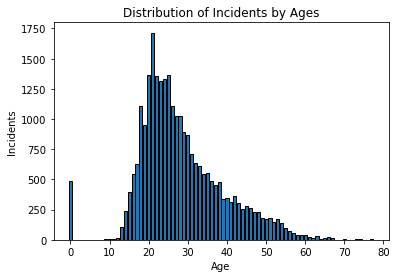

In [13]:
#Graphing Distributions of all gender

plt.bar(force_age_df['EventAge'], force_age_df['count'])
plt.title('Distribution of Incidents by Ages')
plt.xlabel('Age')
plt.ylabel('Incidents');

plt.figsize=(30,10)

<Figure size 7200x4320 with 0 Axes>

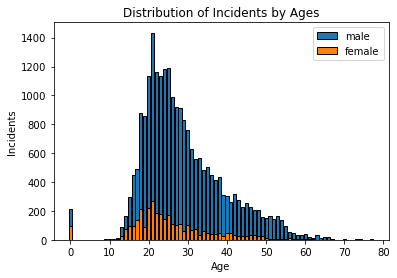

<Figure size 7200x4320 with 0 Axes>

In [22]:
# graphing fistributions of male and female genders

plt.bar(force_male_age_df['EventAge'], force_male_age_df['count'])
plt.title('Distribution of Incidents by Ages')
plt.xlabel('Age')
plt.ylabel('Incidents');


plt.bar(force_female_age_df['EventAge'], force_female_age_df['count'])
plt.title('Distribution of Incidents by Ages')
plt.xlabel('Age')
plt.ylabel('Incidents');

plt.legend(['male','female'])

plt.figure(figsize = (100,60))


**Describe the features you choose here.** Some questions to address: Did you keep `Nan` values? What do those values represent in the data? Did you organize the data in any particular way? What other design choices did you make and why? Did you change the scaling of axes for the side-by-side plots? What message are you trying to communicate, and what decisions did you make in order to do so? Please answer in 5-6 sentences.

For this grpahical representation, I decided to keep in the Nan values which was showin in the data as combined with the age of 0. The nan values means tat age was not recorded for the incident and is combined with the incidents where age is equal to 0. Having a 0 age could mean that the person is below the age of zero which is highly unlikely but cannot be ruled out of possibility. In terms of data organization, I made sure to split the groups between males and females and then sorted the values from highest to lowest to find the age with the highest incident numbers. I also converted the tables into dataframes in order to input them into the code for the vertical bar charts. I overlaid the female and male distributions so that the reader can get a better sense of the differences between the two genders. The message that I am trying to communicate is that the age where people are experiencing the most incidents is 21 all genders. For Males specifically it is also around 21, while in females the age with the highest incidents is also around 21, but has less incidents overall compared to male incidents. 

## A Brief Lesson on More Advanced Plots: Time of Incidence<a id='2'></a>

Please note that this is just an extra lesson, and all code is provided. We have included it so that you can learn about different ways to visually represent the data in the `incidents` table!

The `incidents` table includes information on time and date of when an individual incident occurred. A **heatmap** is a graphical representation of data where the individual values contained in a matrix are represented as colors, and it is a good way to visualize concentration of incident occurence defined within two variables (in this case, `time` and `weekday`). Below, we will create a heatmap to illustrate when incidents were most likely to occur.

First, we define the `weekday` column of the `incidents` table to be a [datetime](https://docs.python.org/2/library/datetime.html) conversion (a Python package dedicated to handling and adjusting how time is portrayed) of the `beginDate` column, which has read in datetime values as strings. Don't worry too much if the code looks too complicated, as it's simply a matter of reading in the `datetime` objects. The code can be copied and pasted exactly as it is in most cases.

Once converted to `datetime` objects, we can use the `weekday()` method from `datetime` to find out the weekday of a given date. For instace, the date 2019-03-13 happened to be a Wednesday, thus `weekday()` on this datetime object would return the value 2 (which corresponds to a Wednesday). For readability, we've converted the numbers to the actual names of the days. 

We also create a column for the hour of day during which the incident occurred by ignoring the minute value of the begin time.

In [15]:
# datetime conversion function of the beginDate to a weekday
def convert_to_weekday(x):
    return datetime.datetime.strptime(x, '%Y-%m-%dT%H:%M:%S.000Z').weekday()
 
# getting weekdays from running beginDate through our function
# and collecting all our hours from beginTime
weekdays = [convert_to_weekday(incidents['beginDate'][i]) for i in range(len(incidents.column('beginDate')))]
days = {0:'Monday', 1:'Tuesday', 2:'Wednesday', \
                        3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}
weekdays = [days[i] for i in weekdays]
hour = incidents['beginTime']//100

# adding columns to our incidents table
# (these columns should appear towards the end of the table)
incidents = incidents.with_columns('weekday', weekdays, 'hour', hour)
incidents.show(5)

X,Y,publicaddress,caseNumber,precinct,reportedDate,reportedTime,beginDate,reportedDateTime,beginTime,offense,description,UCRCode,enteredDate,centergbsid,centerLong,centerLat,centerX,centerY,neighborhood,lastchanged,LastUpdateDateETL,OBJECTID,weekday,hour
-93.3118,45.006,0024XX BROADWAY AVE W,MP201971497,4,2019-03-13T00:00:00.000Z,1046,2019-03-13T00:00:00.000Z,2019-03-13T10:46:00.000Z,1046,THEFT,OTHER THEFT,7,2019-03-13T00:00:00.000Z,10909,-93.3118,45.006,-10387423,5622470,Willard - Hay,2019-03-13T00:00:00.000Z,2019-03-15T08:15:26.000Z,9001,Wednesday,10
-93.3121,44.9979,0018XX SHERIDAN AVE N,MP201971522,4,2019-03-13T00:00:00.000Z,1048,2019-03-12T00:00:00.000Z,2019-03-13T10:48:00.000Z,2000,THEFT,OTHER THEFT,7,2019-03-13T00:00:00.000Z,14596,-93.3121,44.9979,-10387450,5621188,Willard - Hay,2019-03-13T00:00:00.000Z,2019-03-15T08:15:26.000Z,9002,Tuesday,20
-93.2346,45.0087,0019XX HAYES ST NE,MP201971533,2,2019-03-13T00:00:00.000Z,1141,2019-03-13T00:00:00.000Z,2019-03-13T11:41:00.000Z,215,CSCR,CSC - RAPE,3,2019-03-13T00:00:00.000Z,17221,-93.2346,45.0087,-10378828,5622888,Windom Park,2019-03-20T00:00:00.000Z,2019-03-21T08:15:32.000Z,9003,Wednesday,2
-93.2818,45.0048,0024XX WASHINGTON AVE N,MP201971617,4,2019-03-13T00:00:00.000Z,1317,2019-03-12T00:00:00.000Z,2019-03-13T13:17:00.000Z,1749,THEFT,OTHER THEFT,7,2019-03-13T00:00:00.000Z,13725,-93.2818,45.0048,-10384081,5622275,Hawthorne,2019-03-13T00:00:00.000Z,2019-03-15T08:15:26.000Z,9004,Tuesday,17
-93.2283,44.9296,0040XX NOKOMIS AVE S,MP201971661,3,2019-03-13T00:00:00.000Z,1326,2019-02-27T00:00:00.000Z,2019-03-13T13:26:00.000Z,900,ONLTHT,ON-LINE THEFT,7,2019-03-13T00:00:00.000Z,19761,-93.2283,44.9296,-10378128,5610445,Standish,2019-03-13T00:00:00.000Z,2019-03-15T08:15:26.000Z,9005,Wednesday,9


In order to create a heatmap, it is necessary to create a matrix where the columns represent the hours and the rows represent the weekdays.

The values in the individual coordinates of the matrix would be the total count of incidents that correspond to the specific hour and weekday (for example, 87 incidents occurred on the row Wednesday at column 15 hours (3pm) in 2019). We can derive these count values using the `group` method to the `incidents` table and passing in a list of `weekday` and `hour` values as a parameter to the method:

    incidents.group(['weekday', 'hour'])

In order to get the weekdays as rows and the hours as columns, we pivot the table. The `'count'` and `sum` arguments preserve the groupby values as we pivot the table:

    pivot('hour', 'weekday', 'count', sum)
    

In [16]:
# Constructing 2d array for visualization with heatmap.
hour_weekday_matrix = incidents.group(['weekday', 'hour'])
hour_weekday_matrix = hour_weekday_matrix.pivot('hour', 'weekday', 'count', sum)
hour_weekday_matrix

/opt/conda/lib/python3.9/site-packages/datascience/tables.py:920: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  values = np.array(tuple(values))


weekday,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
Friday,92,54,45,25,17,26,20,39,46,43,40,46,79,56,72,78,86,95,103,86,79,75,72,106
Monday,81,40,37,22,18,22,22,39,58,49,36,46,73,56,56,64,66,80,84,79,108,78,76,52
Saturday,121,103,67,40,31,14,19,31,38,47,31,48,79,48,80,59,76,72,78,68,78,67,100,89
Sunday,120,86,73,52,27,23,25,15,29,42,41,31,68,50,55,63,62,75,82,65,68,90,79,59
Thursday,84,35,26,26,34,23,29,49,56,38,33,51,75,51,57,56,69,72,82,73,82,77,72,83
Tuesday,86,35,24,20,21,24,29,49,57,40,60,41,67,59,62,59,73,84,74,95,77,79,82,45
Wednesday,77,38,32,32,11,17,37,41,50,41,50,46,74,60,52,55,54,83,92,78,72,67,88,42


We hope the above matrix make things a little bit clearer. However, there is one issue with the visualization, namely that the weekday values are not ordered logically. We can address this issue by manually changing this order. At this point, we'll switch over to using the python package [pandas](https://pandas.pydata.org/docs/) (a Python package that's explored more in depth in Data 100). It'll help us with sorting the values in our matrix in a particular order, and it works well with the visualization library [seaborn](https://seaborn.pydata.org/), which we'll use to create the heatmap. You aren't expected to know how to use `pandas` or `seaborn`, but we're introducing them here to show what other types of visualizations you could make with the incident data.

In [17]:
# Ordering new 2d array by weekday.
import pandas as pd

weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
hour_weekday_matrix_df = hour_weekday_matrix.to_df()
hour_weekday_matrix_df = hour_weekday_matrix_df.set_index('weekday').reindex(weekday_order)
hour_weekday_matrix_df

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
weekday,,,,,,,,,,,,,,,,,,,,,
Monday,81,40,37,22,18,22,22,39,58,49,...,56,64,66,80,84,79,108,78,76,52
Tuesday,86,35,24,20,21,24,29,49,57,40,...,62,59,73,84,74,95,77,79,82,45
Wednesday,77,38,32,32,11,17,37,41,50,41,...,52,55,54,83,92,78,72,67,88,42
Thursday,84,35,26,26,34,23,29,49,56,38,...,57,56,69,72,82,73,82,77,72,83
Friday,92,54,45,25,17,26,20,39,46,43,...,72,78,86,95,103,86,79,75,72,106
Saturday,121,103,67,40,31,14,19,31,38,47,...,80,59,76,72,78,68,78,67,100,89
Sunday,120,86,73,52,27,23,25,15,29,42,...,55,63,62,75,82,65,68,90,79,59


Now that both the rows and columns are ordered, we can plot our heatmap using the `heatmap` method from the `seaborn` package:

    sns.heatmap(dataframe)
    
The basic idea is to represent the above matrix with colors with a specific color range representing numerical values of each coordinate. The `cmap` parameter of the method simply defines the color map of the visualization. The list of color maps can be found in [this link](https://seaborn.pydata.org/tutorial/color_palettes.html).

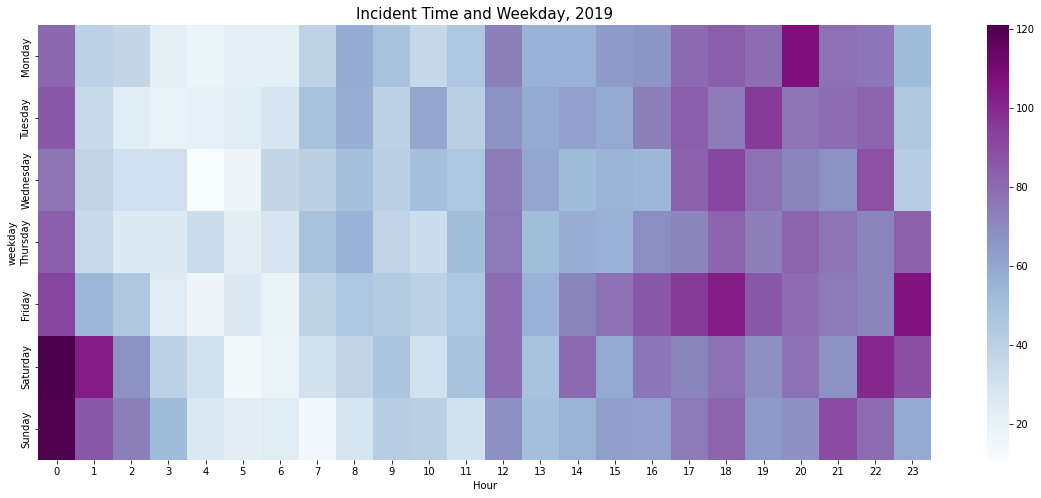

In [18]:
# Graphing the heatmap.
import seaborn as sns

fig, ax = plt.subplots(1, figsize=(20, 8))
sns.heatmap(hour_weekday_matrix_df, cmap='BuPu')
ax.set(xlabel='Hour')
ax.set_title('Incident Time and Weekday, 2019',\
            fontdict={'fontsize': '15', 'fontweight' : '3'});

What kind of insights can you gain from the visualization above? What can you tell about the time that incidents were most likely to occur? What can you tell about the weekday? Can you think of an explanation behind your findings? Spend some time thinking about these questions before reading on.

The visualization makes it clear to the audience that incidents are concentrated in the evenings, and are more likely to occur on weekends than on weekdays. This would make sense because people are generally more active after work hours. However, be aware that the concentration of values at 0 hour could be a result of recording `nan` values as 0's. This needs further exploration of the data for clarification.

Congratulations on making it this far! Don't be too alarmed if you find the above steps overwhelming. These concepts are quite complicated, and we just wanted you to get a sense of what's possible with Python.

Feel free to experiment with the code blocks above to find out what each step is doing to manipulate the given data. Just make sure to reset the variable to what we've defined it to be originally.

---

Notebook developed by: Damien Kwon, Keilyn Yuzuki

Data Science Modules: http://data.berkeley.edu/education/modules

Data Science Offerings at Berkeley: https://data.berkeley.edu/academics/undergraduate-programs/data-science-offerings

